<a href="https://colab.research.google.com/github/alexandre-pinon/voltron/blob/feature%2Fai/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Climate time series data analysis

## Config

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

from tensorflow.keras import layers
from sklearn.preprocessing import minmax_scale

In [2]:
# Check for GPU
!nvidia-smi -L

GPU 0: NVIDIA GeForce RTX 2060 (UUID: GPU-40e49d7d-28f8-2e42-5423-abd4e1b056f4)


## Data loading

In [3]:
# Parse dates and set date column to index
train_df = pd.read_csv("./data/DailyDelhiClimateTrain.csv",
                       parse_dates=["date"],
                       index_col=["date"])
test_df = pd.read_csv("./data/DailyDelhiClimateTest.csv",
                      parse_dates=["date"],
                      index_col=["date"])

## Data vizualisation

In [77]:
train_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [79]:
train_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [4]:
def plot_time_series(ax,
                     timesteps,
                     values,
                     title=None,
                     format='.',
                     start=0,
                     end=None,
                     label=None,
                     c='b'):
    """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  ax : matplotlib.Axes to plot
  timesteps : array of timesteps
  values : array of values across time
  title : title of plot
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  c : color, default 'blue'
  """
    ax.plot(timesteps[start:end], values[start:end], format, c=c, label=label)
    ax.set_xlabel("Time")
    ax.tick_params('x', labelrotation=45)
    ax.grid(True)

    if title:
        ax.set_title(title, fontsize=16)
    if label:
        ax.legend(fontsize=14, bbox_to_anchor=(1, 1), loc='upper left')


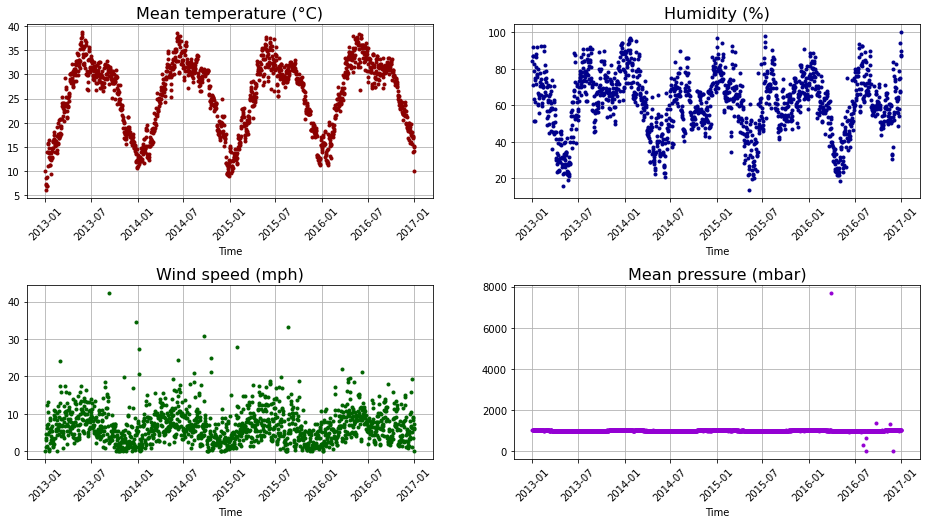

In [81]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,
                                             2,
                                             figsize=(16, 8),
                                             gridspec_kw={'hspace': .5})

plot_time_series(ax1,
                 train_df.index,
                 train_df["meantemp"],
                 "Mean temperature (°C)",
                 c='darkred')
plot_time_series(ax2,
                 train_df.index,
                 train_df["humidity"],
                 "Humidity (%)",
                 c='darkblue')
plot_time_series(ax3,
                 train_df.index,
                 train_df["wind_speed"],
                 "Wind speed (mph)",
                 c='darkgreen')
plot_time_series(ax4,
                 train_df.index,
                 train_df["meanpressure"],
                 "Mean pressure (mbar)",
                 c='darkviolet')

# fig.savefig('./graphs/train_data.png', facecolor='white')

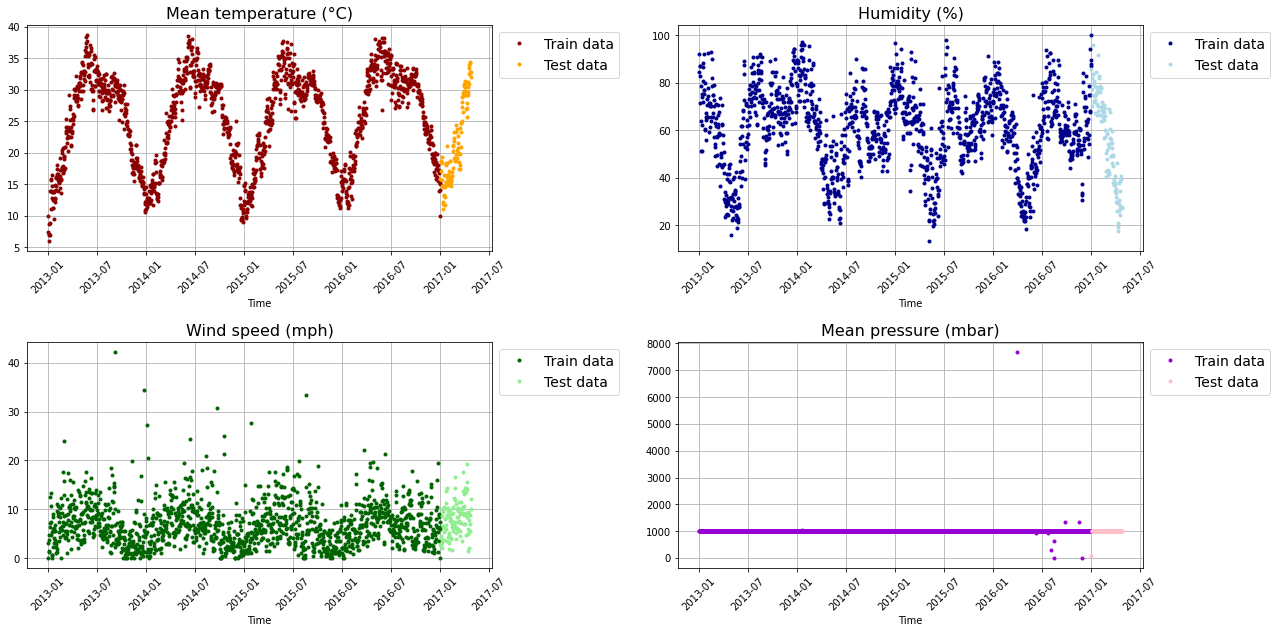

In [82]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,
                                             2,
                                             figsize=(20, 10),
                                             gridspec_kw={
                                                 'wspace': .4,
                                                 'hspace': .4
                                             })

plot_time_series(ax1,
                 train_df.index,
                 train_df["meantemp"],
                 "Mean temperature (°C)",
                 label='Train data',
                 c='darkred')
plot_time_series(ax1,
                 test_df.index,
                 test_df["meantemp"],
                 "Mean temperature (°C)",
                 label='Test data',
                 c='orange')
plot_time_series(ax2,
                 train_df.index,
                 train_df["humidity"],
                 "Humidity (%)",
                 label='Train data',
                 c='darkblue')
plot_time_series(ax2,
                 test_df.index,
                 test_df["humidity"],
                 "Humidity (%)",
                 label='Test data',
                 c='lightblue')
plot_time_series(ax3,
                 train_df.index,
                 train_df["wind_speed"],
                 "Wind speed (mph)",
                 label='Train data',
                 c='darkgreen')
plot_time_series(ax3,
                 test_df.index,
                 test_df["wind_speed"],
                 "Wind speed (mph)",
                 label='Test data',
                 c='lightgreen')
plot_time_series(ax4,
                 train_df.index,
                 train_df["meanpressure"],
                 "Mean pressure (mbar)",
                 label='Train data',
                 c='darkviolet')
plot_time_series(ax4,
                 test_df.index,
                 test_df["meanpressure"],
                 "Mean pressure (mbar)",
                 label='Test data',
                 c='pink')

# fig.savefig('./graphs/train_plus_test_data.png', facecolor='white')

# Univariate predictions on mean temperature

## Model 0 : Naïve forecast (baseline)

Let's start with a baseline: the [Naïve forecast](https://otexts.com/fpp3/simple-methods.html#na%C3%AFve-method)

For naïve forecasts, we simply set all forecasts to be the value of the last observation. That is,
\begin{equation*}
  y_t = y_{t-1} 
\end{equation*}

In [5]:
X_train = train_df.index
X_test = test_df.index
y_train = train_df["meantemp"]
y_test = test_df["meantemp"]

In [6]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1462,)
X_test shape: (114,)
y_train shape: (1462,)
y_test shape: (114,)


In [85]:
# Create a naïve forecast
naive_forecast = y_test[:
                        -1]  # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:]  # View frist 10 and last 10


(date
 2017-01-01    15.913043
 2017-01-02    18.500000
 2017-01-03    17.111111
 2017-01-04    18.700000
 2017-01-05    18.388889
 2017-01-06    19.318182
 2017-01-07    14.708333
 2017-01-08    15.684211
 2017-01-09    14.571429
 2017-01-10    12.111111
 Name: meantemp, dtype: float64,
 date
 2017-04-14    30.500000
 2017-04-15    31.222222
 2017-04-16    31.000000
 2017-04-17    32.555556
 2017-04-18    34.000000
 2017-04-19    33.500000
 2017-04-20    34.500000
 2017-04-21    34.250000
 2017-04-22    32.900000
 2017-04-23    32.875000
 Name: meantemp, dtype: float64)

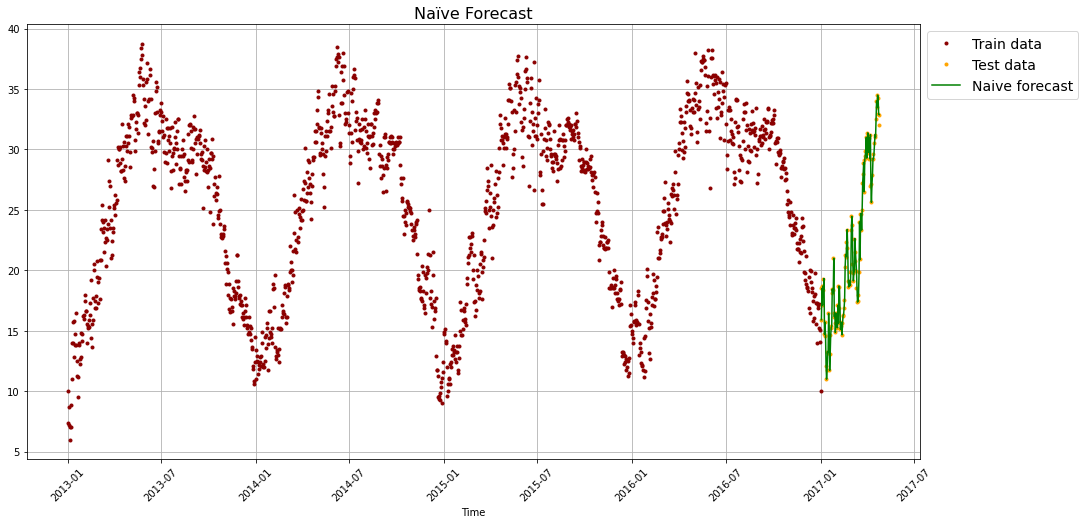

In [86]:
# Plot naive forecast
fig, ax = plt.subplots(figsize=(16, 8))
plot_time_series(ax, X_train, y_train, label="Train data", c='darkred')
plot_time_series(ax, X_test, y_test, label="Test data", c='orange')
plot_time_series(ax,
                 X_test[1:],
                 naive_forecast,
                 title="Naïve Forecast",
                 format="-",
                 label="Naive forecast",
                 c='green')


Let's zoom in to get a better look

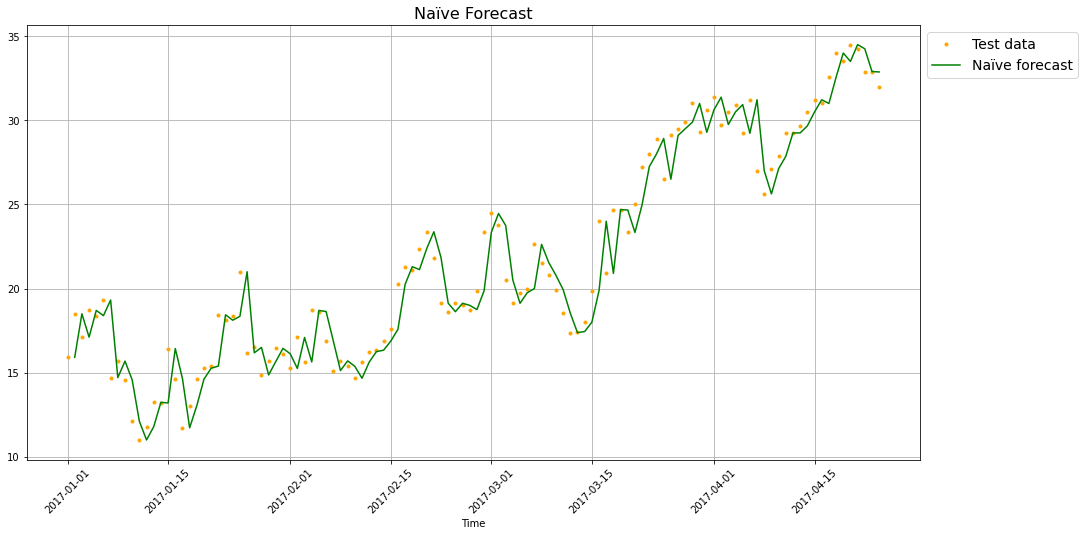

In [87]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_time_series(ax, X_test, y_test, label="Test data", c='orange')
plot_time_series(ax,
                 X_test[1:],
                 naive_forecast,
                 title="Naïve Forecast",
                 format="-",
                 label="Naïve forecast",
                 c='green')

# fig.savefig('./graphs/model_0_naive_forecast.png', facecolor='white')

## Evaluate model

In [7]:
def mean_absolute_scaled_error(y_true, y_pred):
    """
  Implement MASE (assuming no seasonality of data).
  """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(
        y_true[1:] -
        y_true[:-1]))  # our seasonality is 1 day (hence the shifting of 1 day)

    return mae / mae_naive_no_season


In [8]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(
        y_true,
        y_pred)  # puts and emphasis on outliers (all errors get squared)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }


In [90]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
pd.Series(naive_results)

mae     1.317634
mse     2.855880
rmse    1.689935
mape    6.656282
mase    1.008676
dtype: float32

In [91]:
# Find average mean temperature in test dataset
tf.reduce_mean(y_test).numpy()

21.713078920228238

## Windowing dataset

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

Window for one week (univariate time series)

- [0, 1, 2, 3, 4, 5, 6] -> [7]
- [1, 2, 3, 4, 5, 6, 7] -> [8]
- [2, 3, 4, 5, 6, 7, 8] -> [9]

In [9]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
    return x[:, :-horizon], x[:, -horizon:]


In [10]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
    """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
    # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(
        np.arange(len(x) - (window_size + horizon - 1)),
        axis=0).T  # create 2D array of windows of size window_size

    # 3. Index on the target array (time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels


## Creating training/validation/test datasets

In [11]:
def make_train_val_splits(windows, labels, val_split=0.2):
    """
  Splits matching pairs of windows and labels into train and val splits.
  """
    split_size = int(len(windows) *
                     (1 - val_split))  # this will default to 80% train/20% val
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    val_windows = windows[split_size:]
    val_labels = labels[split_size:]
    return train_windows, val_windows, train_labels, val_labels


In [12]:
WINDOW_SIZE = 7  # use a week worth of timesteps to predict the horizon
HORIZON = 1  # predict 1 step at a time

In [96]:
train_windows, train_labels = make_windows(y_train.to_numpy(),
                                           window_size=WINDOW_SIZE,
                                           horizon=HORIZON)
train_windows, val_windows, train_labels, val_labels = make_train_val_splits(
    train_windows, train_labels, val_split=0.2)
test_windows, test_labels = make_windows(y_test.to_numpy(),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)


In [97]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {train_windows[i]} -> Label: {train_labels[i]}")

# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {train_windows[i-3]} -> Label: {train_labels[i-3]}")


Window: [10.          7.4         7.16666667  8.66666667  6.          7.
  7.        ] -> Label: [8.85714286]
Window: [7.4        7.16666667 8.66666667 6.         7.         7.
 8.85714286] -> Label: [14.]
Window: [ 7.16666667  8.66666667  6.          7.          7.          8.85714286
 14.        ] -> Label: [11.]
Window: [23.71428571 23.42857143 24.         25.5625     25.06666667 24.5625
 24.25      ] -> Label: [22.375]
Window: [23.42857143 24.         25.5625     25.06666667 24.5625     24.25
 22.375     ] -> Label: [24.06666667]
Window: [24.         25.5625     25.06666667 24.5625     24.25       22.375
 24.06666667] -> Label: [23.9375]


In [98]:
print(f"train_windows shape: {train_windows.shape}")
print(f"val_windows shape: {val_windows.shape}")
print(f"test_windows shape: {test_windows.shape}")
print("-" * 30)
print(f"train_labels shape: {train_labels.shape}")
print(f"val_labels shape: {val_labels.shape}")
print(f"test_labels shape: {test_labels.shape}")

train_windows shape: (1164, 7)
val_windows shape: (291, 7)
test_windows shape: (107, 7)
------------------------------
train_labels shape: (1164, 1)
val_labels shape: (291, 1)
test_labels shape: (107, 1)


## Model checkpoint

In [13]:
import os


# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path,
                              model_name),  # create filepath to save model
        verbose=0,  # only output a limited amount of text
        save_best_only=True)  # save only the best model to file


## Model 1: Dense model (window = 7, horizon = 1)


In [100]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        # linear activation is the same as having no activation
        layers.Dense(HORIZON, activation="linear")
    ],
    name="model_1_dense")

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit model
model_1.fit(
    x=train_windows,  # train windows of 7 dqys
    y=train_labels,  # horizon value of 1 (using the previous 7 timesteps to predict next day)
    epochs=100,
    verbose=1,
    batch_size=128,
    validation_data=(val_windows, val_labels),
    # create ModelCheckpoint callback to save best model
    callbacks=[create_model_checkpoint(model_name=model_1.name)])


Epoch 1/100
10/10 [==============================] - 1s 42ms/step - loss: 9.1974 - mae: 9.1974 - val_loss: 1.5992 - val_mae: 1.5992
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 2.8749 - mae: 2.8749 - val_loss: 2.8037 - val_mae: 2.8037
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1.9133 - mae: 1.9133 - val_loss: 2.0747 - val_mae: 2.0747
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 1.7657 - mae: 1.7657 - val_loss: 1.7458 - val_mae: 1.7458
Epoch 5/100
10/10 [==============================] - 0s 35ms/step - loss: 1.6233 - mae: 1.6233 - val_loss: 1.5501 - val_mae: 1.5501
Epoch 6/100
10/10 [==============================] - 0s 35ms/step - loss: 1.5960 - mae: 1.5960 - val_loss: 1.5230 - val_mae: 1.5230
Epoch 7/100
10/10 [==============================] - 0s 35ms/step - loss: 1.5594 - mae: 1.5594 - val_loss: 1.4735 - val_mae: 1.4735
Epoch 8/100
10/10 [==============================] - 0s 34ms/step - loss: 1.537

In [101]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 1.2900 - mae: 1.2900


[1.290042519569397, 1.290042519569397]

In [102]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 1.2900 - mae: 1.2900


[1.290042519569397, 1.290042519569397]

In [14]:
def make_preds(model, input_data):
    """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)  # return 1D array of predictions


In [104]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

4/4 [==============================] - 0s 2ms/step


(107,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([15.67111  , 16.079615 , 15.214679 , 13.135738 , 11.8633795,
        12.607443 , 13.189852 , 13.46973  , 15.928818 , 14.890244 ],
       dtype=float32)>)

In [105]:
# Evaluate preds
model_1_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),  # reduce to right shape
    y_pred=model_1_preds)
pd.Series(model_1_results)

mae     1.290043
mse     2.693859
rmse    1.641298
mape    6.402803
mase    1.001778
dtype: float32

In [106]:
pd.Series(naive_results)

mae     1.317634
mse     2.855880
rmse    1.689935
mape    6.656282
mase    1.008676
dtype: float32

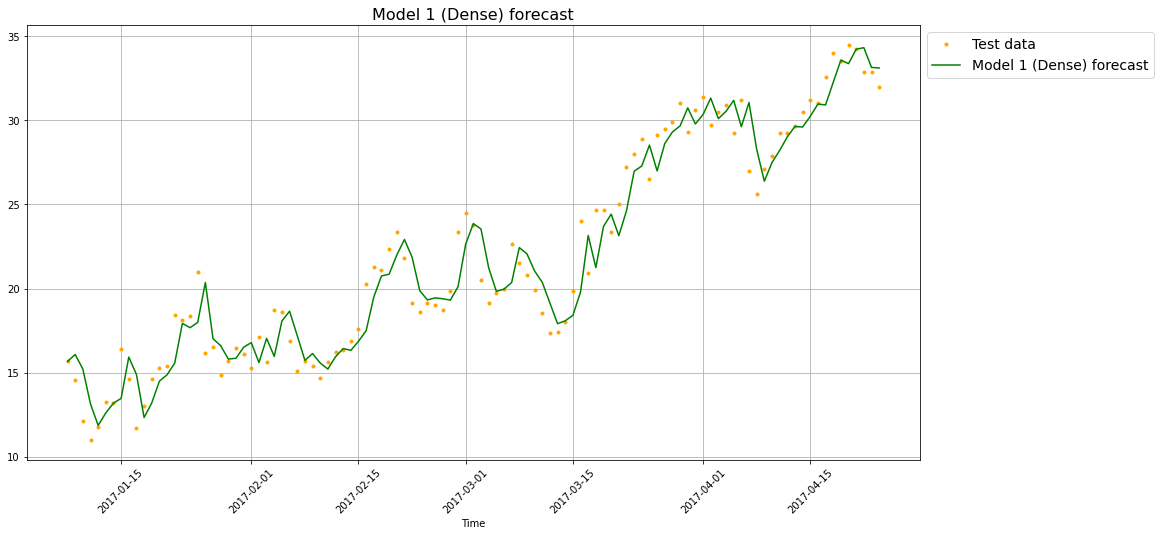

In [107]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_time_series(ax,
                 X_test[-len(test_windows):],
                 test_labels[:, 0],
                 label="Test data",
                 c='orange')
plot_time_series(ax,
                 X_test[-len(test_windows):],
                 model_1_preds,
                 title="Model 1 (Dense) forecast",
                 format="-",
                 label="Model 1 (Dense) forecast",
                 c='green')

# fig.savefig('./graphs/model_1_dense_forecast.png', facecolor='white')

## Model 2: Dense (window = 30, horizon = 1)

In [108]:
WINDOW_SIZE = 30  # use 30 timesteps in the past
HORIZON = 1  # predict one step at a time


In [109]:
train_windows, train_labels = make_windows(y_train.to_numpy(),
                                           window_size=WINDOW_SIZE,
                                           horizon=HORIZON)
train_windows, val_windows, train_labels, val_labels = make_train_val_splits(
    train_windows, train_labels, val_split=0.2)
test_windows, test_labels = make_windows(y_test.to_numpy(),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)


In [110]:
print(f"train_windows shape: {train_windows.shape}")
print(f"val_windows shape: {val_windows.shape}")
print(f"test_windows shape: {test_windows.shape}")
print("-" * 30)
print(f"train_labels shape: {train_labels.shape}")
print(f"val_labels shape: {val_labels.shape}")
print(f"test_labels shape: {test_labels.shape}")

train_windows shape: (1145, 30)
val_windows shape: (287, 30)
test_windows shape: (84, 30)
------------------------------
train_labels shape: (1145, 1)
val_labels shape: (287, 1)
test_labels shape: (84, 1)


In [111]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential(
    [
        layers.Dense(128, activation="relu"),
        # need to predict horizon number of steps into the future
        layers.Dense(HORIZON)
    ],
    name="model_2_dense")

model_2.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(val_windows, val_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [112]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 1.4337


1.4337127208709717

In [113]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 1.4337


1.4337127208709717

In [114]:
# Get forecast predictions
model_2_preds = make_preds(model_2, input_data=test_windows)

3/3 [==============================] - 0s 2ms/step


In [115]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),  # remove 1 dimension of test labels
    y_pred=model_2_preds)
pd.Series(model_2_results)

mae     1.433713
mse     3.170847
rmse    1.780687
mape    6.325953
mase    1.155348
dtype: float32

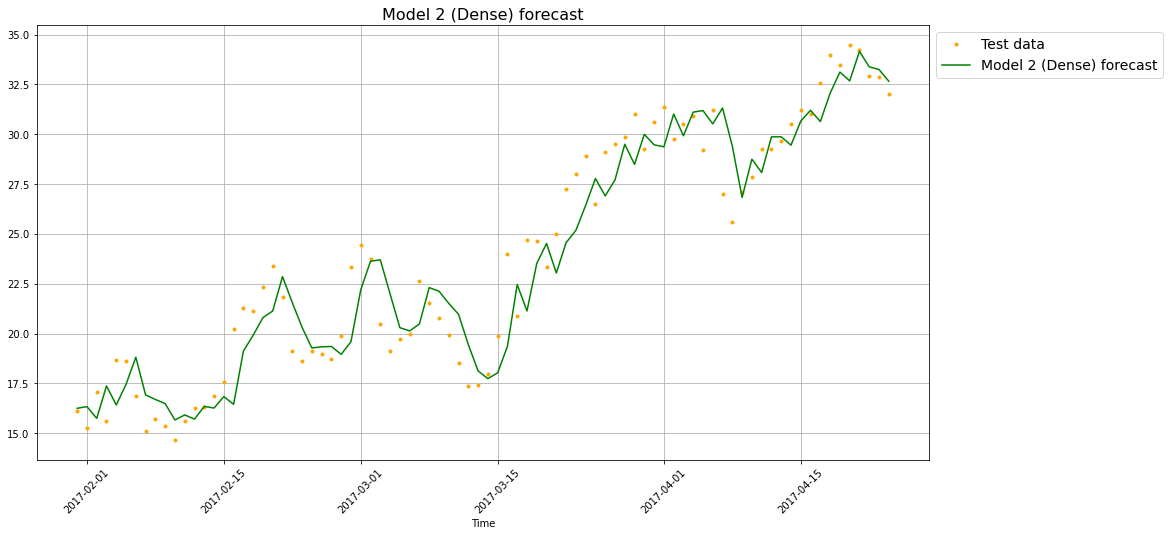

In [116]:
fig, ax = plt.subplots(figsize=(16, 8))
plot_time_series(ax,
                 X_test[-len(test_windows):],
                 test_labels[:, 0],
                 label="Test data",
                 c='orange')
plot_time_series(ax,
                 X_test[-len(test_windows):],
                 model_2_preds,
                 title="Model 2 (Dense) forecast",
                 format="-",
                 label="Model 2 (Dense) forecast",
                 c='green')

# fig.savefig('./graphs/model_2_dense_forecast.png', facecolor='white')

## Model 3: Dense (window = 30, horizon = 7)

In [117]:
WINDOW_SIZE = 30
HORIZON = 7

In [118]:
train_windows, train_labels = make_windows(y_train.to_numpy(),
                                           window_size=WINDOW_SIZE,
                                           horizon=HORIZON)
train_windows, val_windows, train_labels, val_labels = make_train_val_splits(
    train_windows, train_labels, val_split=0.2)
test_windows, test_labels = make_windows(y_test.to_numpy(),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)


In [119]:
print(f"train_windows shape: {train_windows.shape}")
print(f"val_windows shape: {val_windows.shape}")
print(f"test_windows shape: {test_windows.shape}")
print("-" * 30)
print(f"train_labels shape: {train_labels.shape}")
print(f"val_labels shape: {val_labels.shape}")
print(f"test_labels shape: {test_labels.shape}")

train_windows shape: (1140, 30)
val_windows shape: (286, 30)
test_windows shape: (78, 30)
------------------------------
train_labels shape: (1140, 7)
val_labels shape: (286, 7)
test_labels shape: (78, 7)


In [120]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(
    [layers.Dense(128, activation="relu"),
     layers.Dense(HORIZON)],
    name="model_3_dense")

model_3.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(val_windows, val_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [121]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 2.6030


2.602966785430908

In [122]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

3/3 [==============================] - 0s 3ms/step - loss: 2.5546


2.554609537124634

In [123]:
model_3_preds = make_preds(model_3, input_data=test_windows)
model_3_preds[:5]

3/3 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[16.983166, 15.787941, 16.383446, 17.2003  , 17.671284, 17.907055,
        16.58857 ],
       [16.517353, 16.585804, 16.330908, 17.314293, 16.918818, 17.059563,
        16.12784 ],
       [15.957375, 16.837864, 16.344376, 16.687126, 16.655485, 16.616152,
        16.133661],
       [17.072655, 17.13398 , 17.661736, 17.426556, 17.106728, 17.084002,
        17.33944 ],
       [16.282696, 15.905679, 16.445501, 16.758034, 16.057457, 16.046686,
        16.795835]], dtype=float32)>

In [124]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
pd.Series(model_3_results)

mae     [0.8172954, 0.96271217, 1.2561901, 1.4057128, ...
mse     [0.80651665, 1.1760372, 2.0749202, 2.20668, 3....
rmse    [0.8980627, 1.0844524, 1.4404583, 1.4854898, 1...
mape    [4.8798327, 5.7073812, 7.3360972, 8.663344, 8....
mase                                             2.038044
dtype: object

### Make our evaluation function work for larger horizons

In [125]:
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, reduce to single number)
    if mae.ndim > 0:  # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [126]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
pd.Series(model_3_results)

mae      2.554610
mse      9.844913
rmse     2.894865
mape    10.886456
mase     2.038044
dtype: float32

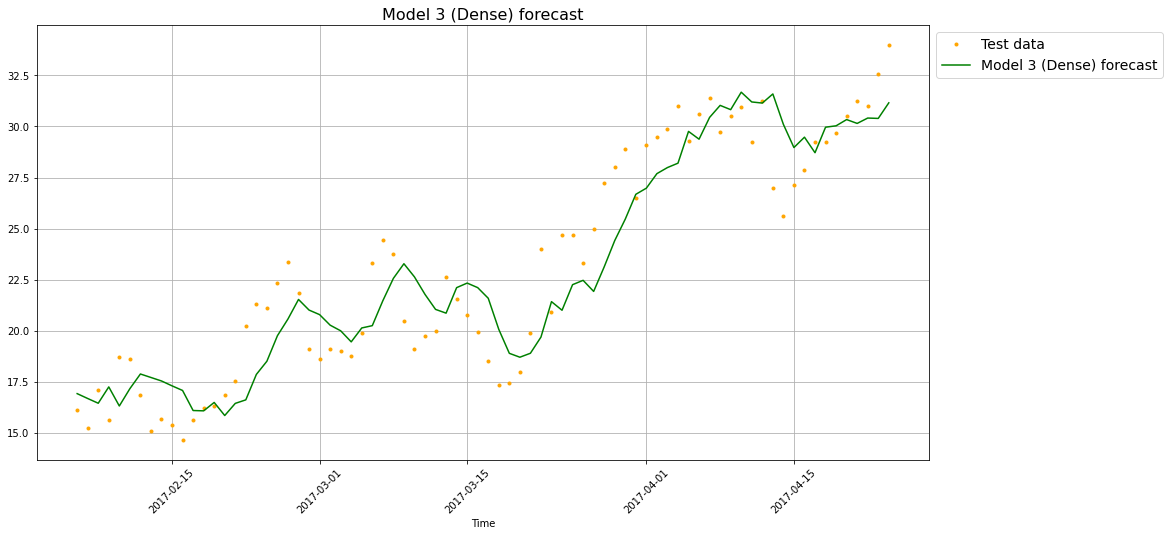

In [127]:
fig, ax = plt.subplots(figsize=(16, 8))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(ax,
                 X_test[-len(test_windows):],
                 test_labels[:, 0],
                 label="Test data",
                 c='orange')
plot_time_series(ax,
                 X_test[-len(test_windows):],
                 tf.reduce_mean(model_3_preds, axis=1),
                 title="Model 3 (Dense) forecast",
                 format="-",
                 label="Model 3 (Dense) forecast",
                 c='green')

# fig.savefig('./graphs/model_3_dense_forecast.png', facecolor='white')

## Performance benchmark

Which of our models is performing best so far ?

<AxesSubplot:>

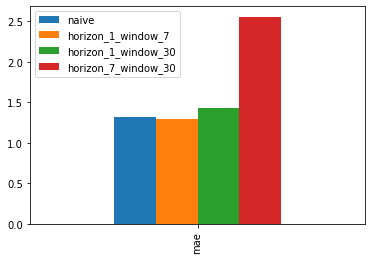

In [128]:
fig, ax = plt.subplots()
pd.DataFrame(
    {
        "naive": naive_results["mae"],
        "horizon_1_window_7": model_1_results["mae"],
        "horizon_1_window_30": model_2_results["mae"],
        "horizon_7_window_30": model_3_results["mae"]
    },
    index=["mae"]).plot(ax=ax, kind="bar")

# fig.savefig('./graphs/performance_benchmark_1.png', facecolor='white')

The dense model with a horizon of 1 and a window size of 7 looks to be performing the best.

Because of this, let's use HORIZON=1 and WINDOW_SIZE=7 for our next series of modelling experiments (in other words, we'll use the previous week of temperature to try and predict the next day).

## Model 4: Conv1D

In [15]:
HORIZON = 1
WINDOW_SIZE = 7

In [16]:
train_windows, train_labels = make_windows(y_train.to_numpy(),
                                           window_size=WINDOW_SIZE,
                                           horizon=HORIZON)
train_windows, val_windows, train_labels, val_labels = make_train_val_splits(
    train_windows, train_labels, val_split=0.2)
test_windows, test_labels = make_windows(y_test.to_numpy(),
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)


In [17]:
print(f"train_windows shape: {train_windows.shape}")
print(f"val_windows shape: {val_windows.shape}")
print(f"test_windows shape: {test_windows.shape}")
print("-" * 30)
print(f"train_labels shape: {train_labels.shape}")
print(f"val_labels shape: {val_labels.shape}")
print(f"test_labels shape: {test_labels.shape}")

train_windows shape: (1164, 7)
val_windows shape: (291, 7)
test_windows shape: (107, 7)
------------------------------
train_labels shape: (1164, 1)
val_labels shape: (291, 1)
test_labels shape: (107, 1)


In [ ]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential(
    [
        # Create Lambda layer to reshape inputs, without this layer, the model will error
        layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
        layers.Conv1D(
            filters=128, kernel_size=5, padding="causal", activation="relu"),
        layers.Dense(HORIZON)
    ],
    name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(val_windows, val_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [133]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_12 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 8ms/step - loss: 1.3292


1.329171895980835

In [135]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

4/4 [==============================] - 0s 6ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([16.191538, 15.955674, 15.352021, 13.325554, 12.144022, 12.292541,
       13.12798 , 13.402373, 15.546282, 14.949918], dtype=float32)>

In [136]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
pd.Series(model_4_results)

mae     1.329172
mse     2.771875
rmse    1.664895
mape    6.604771
mase    1.032164
dtype: float32

## Model 5: RNN (LSTM)

In [40]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
# expand input dimension to be compatible with LSTM
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu", return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae", optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(val_windows, val_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


In [41]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 1.3184


1.3183847665786743

In [42]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

4/4 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.399531, 15.743427, 15.095671, 12.498197, 11.838802, 12.002444,
       12.98337 , 13.203856, 16.338276, 14.888913], dtype=float32)>

In [43]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
pd.Series(model_5_results)

mae     1.318385
mse     2.832050
rmse    1.682870
mape    6.468732
mase    1.023787
dtype: float32

## Optimizing attempts
### One LSTM cell (activation="relu")
- mae     1.334015
- mse     2.797141
- rmse    1.672465
- mape    6.538081
- mase    1.035925
### One LSTM cell (activation="tanh")
- mae     1.412117
- mse     3.029590
- rmse    1.740572
- mape    6.995653
- mase    1.096574
### One LSTM cell (activation="relu") + One Dense(32) layer
- mae     1.326095
- mse     2.832967
- rmse    1.683142
- mape    6.507239
- mase    1.029775
### TWO LSTM cell (activation="relu") + One Dense(32) layer
- mae     1.318385
- mse     2.832050
- rmse    1.682870
- mape    6.468732
- mase    1.023787

# Multivariate predictions

Let's still try to predict `meantemp`, but this time adding other air variables to the equation.

In [70]:
df = pd.concat([train_df, test_df])
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


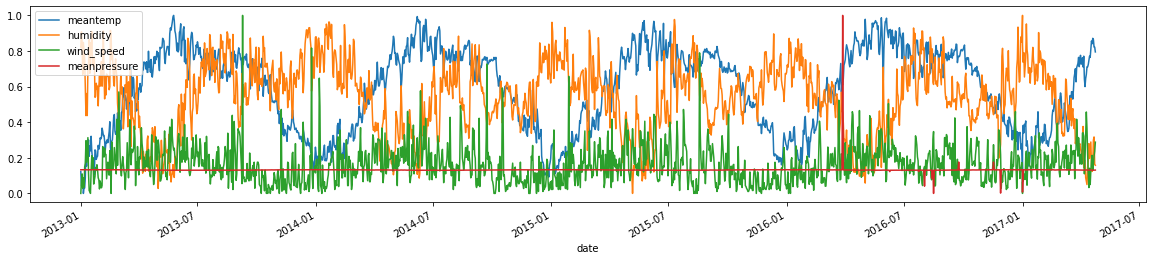

In [71]:
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
scaled_df = pd.DataFrame(minmax_scale(df),
                               columns=df.columns,
                               index=df.index)
fig, ax = plt.subplots(figsize=(20, 4))
scaled_df.plot(ax=ax, style="-")

# fig.savefig('./graphs/data_scaled.png', facecolor='white')

As we can see meanpressure is pretty much constant throughout the dataset and does not seem exploitable

In [76]:
df.drop("meanpressure", axis=1, inplace=True)

In [77]:
df.head()

,meantemp,humidity,wind_speed
date,,,
2013-01-01,10.000000,84.500000,0.000000
2013-01-02,7.400000,92.000000,2.980000
2013-01-03,7.166667,87.000000,4.633333
2013-01-04,8.666667,71.333333,1.233333
2013-01-05,6.000000,86.833333,3.700000


## Making a windowed dataset with pandas

In [72]:
WINDOW_SIZE = 7
HORIZON = 1

In [90]:
df_windowed = df.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):  # Shift values for each step in WINDOW_SIZE
    df_windowed[f"meantemp{-(i+1)}"] = df_windowed["meantemp"].shift(periods=i +
                                                                   1)
df_windowed.head(10)

,meantemp,humidity,wind_speed,meantemp-1,meantemp-2,meantemp-3,meantemp-4,meantemp-5,meantemp-6,meantemp-7
date,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,7.166667,87.000000,4.633333,7.400000,10.000000,NaN,NaN,NaN,NaN,NaN
2013-01-04,8.666667,71.333333,1.233333,7.166667,7.400000,10.000000,NaN,NaN,NaN,NaN
2013-01-05,6.000000,86.833333,3.700000,8.666667,7.166667,7.400000,10.000000,NaN,NaN,NaN
2013-01-06,7.000000,82.800000,1.480000,6.000000,8.666667,7.166667,7.400000,10.000000,NaN,NaN
2013-01-07,7.000000,78.600000,6.300000,7.000000,6.000000,8.666667,7.166667,7.400000,10.000000,NaN
2013-01-08,8.857143,63.714286,7.142857,7.000000,7.000000,6.000000,8.666667,7.166667,7.400000,10.000000
2013-01-09,14.000000,51.250000,12.500000,8.857143,7.000000,7.000000,6.000000,8.666667,7.166667,7.400000


In [91]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = df_windowed.dropna().drop("meantemp", axis=1).astype(np.float32)
y = df_windowed.dropna()["meantemp"].astype(np.float32)
X.head()

,humidity,wind_speed,meantemp-1,meantemp-2,meantemp-3,meantemp-4,meantemp-5,meantemp-6,meantemp-7
date,,,,,,,,,
2013-01-08,63.714287,7.142857,7.000000,7.000000,6.000000,8.666667,7.166667,7.400000,10.000000
2013-01-09,51.250000,12.500000,8.857142,7.000000,7.000000,6.000000,8.666667,7.166667,7.400000
2013-01-10,62.000000,7.400000,14.000000,8.857142,7.000000,7.000000,6.000000,8.666667,7.166667
2013-01-11,51.285713,10.571428,11.000000,14.000000,8.857142,7.000000,7.000000,6.000000,8.666667
2013-01-12,74.000000,13.228572,15.714286,11.000000,14.000000,8.857142,7.000000,7.000000,6.000000


In [92]:
# View labels
y.head()

date
2013-01-08     8.857142
2013-01-09    14.000000
2013-01-10    11.000000
2013-01-11    15.714286
2013-01-12    14.000000
Name: meantemp, dtype: float32

In [93]:
# Make train, val and test sets
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.2)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:train_size+val_size], y[train_size:train_size+val_size]
X_test, y_test = X[train_size+val_size:], y[train_size+val_size:]

In [94]:
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print("-" * 30)
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1098, 9)
X_val shape: (313, 9)
X_test shape: (158, 9)
------------------------------
y_train shape: (1098,)
y_val shape: (313,)
y_test shape: (158,)
